In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in Data

data = pd.read_table('TaylorSwiftSongs.csv', delimiter=',')
data = data.drop('Unnamed: 0', axis=1)
data.loc[data['Album']=='The Taylor Swift Holiday Collection','Album'] = 'Holiday Collection'
data

,Title,Album,Track Number,Play Count,Duration in Seconds,Peak Chart Position,Weeks on Chart,Single,Music Video,Set List
0,Tim McGraw,Taylor Swift,1,85909025,232.106,40,20,1,1,0
1,Picture To Burn,Taylor Swift,2,114595018,173.066,28,20,1,1,0
2,Teardrops On My Guitar,Taylor Swift,3,156881355,203.040,13,48,1,1,0
3,A Place in this World,Taylor Swift,4,24588352,199.200,0,0,0,0,0
4,Cold As You,Taylor Swift,5,25614371,239.013,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
195,Dear Reader,Midnights,20,63761917,225.194,45,2,0,0,0
196,Eyes Open,Single,1,46390604,244.586,19,13,1,0,0
197,Highway Don't Care,Single,1,185177965,276.880,22,20,1,1,0
198,I Don’t Wanna Live Forever,Single,1,1363948086,247.160,0,0,0,0,0


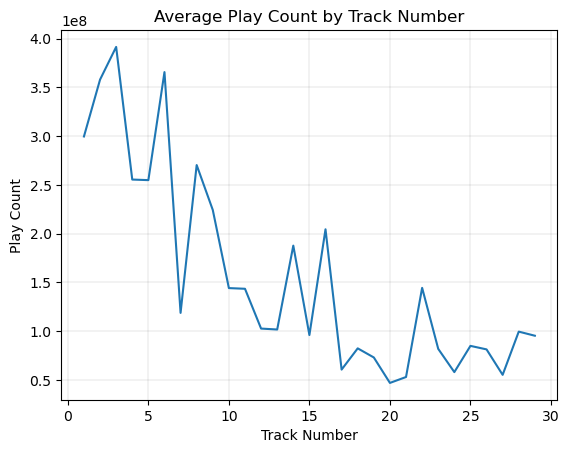

In [3]:
# Play Count by Track Number

track_avg = list(data.groupby('Track Number')['Play Count'].mean())
track = range(1,30)
ax = sns.lineplot(x=track, y=track_avg)
plt.xlabel('Track Number')
plt.ylabel('Play Count')
plt.title('Average Play Count by Track Number')
ax.grid(visible=True, which='major', color='black', linewidth=0.075);
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\track-number.jpg")

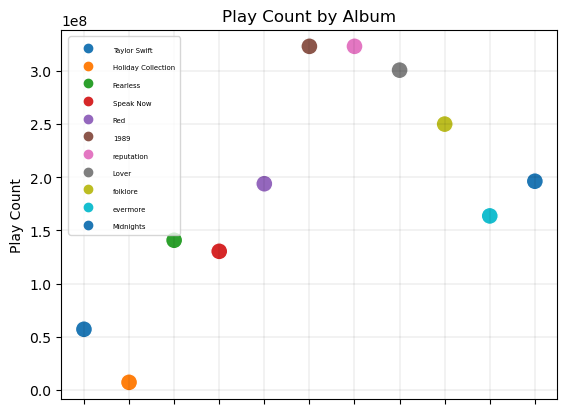

In [4]:
# Play Count by Album

album=(data['Album'].drop_duplicates()[0:11])
album_avg = data.groupby('Album', sort=False)['Play Count'].mean()[0:11]

ax = plt.gca()
ax.xaxis.set_tick_params(labelbottom=False)
plot = sns.scatterplot(x=list(album), y=list(album_avg), hue=list(album), palette='tab10', s=150)
plt.xlabel('Album')
plt.ylabel('Play Count')
plt.title('Play Count by Album')
plt.setp(plot.get_legend().get_texts(), fontsize='5')
plot.grid(visible=True, which='major', color='black', linewidth=0.075);
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\album-count-1.jpg")

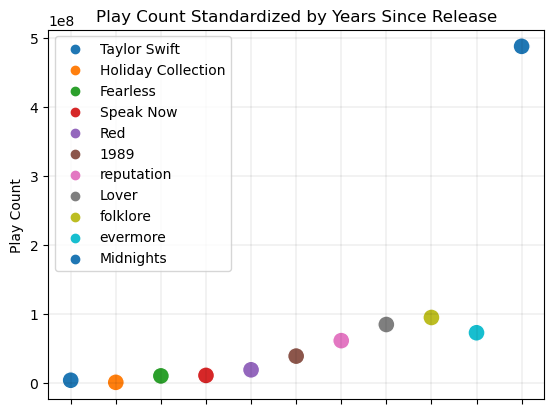

In [5]:
# Play Count by Album by Year

years = [5988/365,5633/365,5239/365,4526/365,3798/365,3063/365,1936/365,1302/365,966/365,826/365,147/365]
album_avg_1 = album_avg[0:11]
plays = album_avg_1/years
album=(data['Album'].drop_duplicates()[0:11])

ax = plt.gca()
ax.xaxis.set_tick_params(labelbottom=False)
plot = sns.scatterplot(x=list(album), y=list(plays), hue=list(album), palette='tab10', s=150)
plt.xlabel('Album')
plt.ylabel('Play Count')
plt.title('Play Count Standardized by Years Since Release')
plot.grid(visible=True, which='major', color='black', linewidth=0.075);
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\album-count-2.jpg")

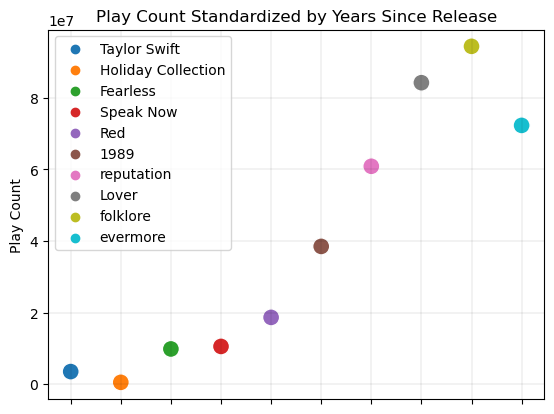

In [6]:
# Play Count by Album by Year Except for Midnights

years = [5988/365,5633/365,5239/365,4526/365,3798/365,3063/365,1936/365,1302/365,966/365,826/365]
album_avg_1 = album_avg[0:10]
plays = album_avg_1/years
album=(data['Album'].drop_duplicates()[0:10])

ax = plt.gca()
ax.xaxis.set_tick_params(labelbottom=False)
plot = sns.scatterplot(x=list(album), y=list(plays), hue=list(album), palette='tab10', s=150)
plt.xlabel('Album')
plt.ylabel('Play Count')
plt.title('Play Count Standardized by Years Since Release')
plot.grid(visible=True, which='major', color='black', linewidth=0.075);
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\album-count-3.jpg")

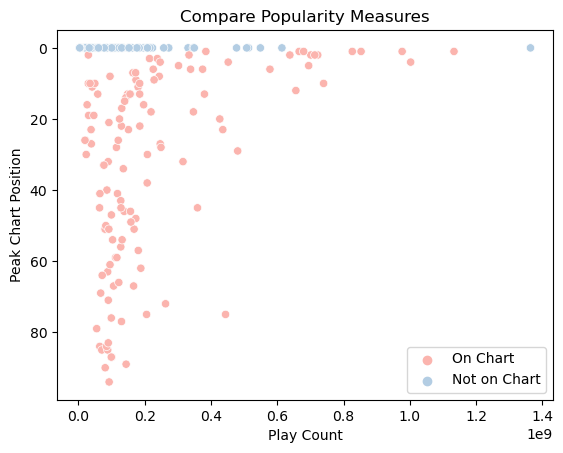

In [7]:
# Play Count v Peak Chart Position

chart = ['On Chart']*len(data)
for i in range(len(data)):
    if (data.loc[i,'Peak Chart Position']==0):
        chart[i] = 'Not on Chart'

sns.scatterplot(x=data['Play Count'], y=data['Peak Chart Position'], hue=chart, palette='Pastel1')
plt.xlabel('Play Count')
plt.ylabel('Peak Chart Position')
plt.ylim(max(data['Peak Chart Position'])+5,-5)
plt.title('Compare Popularity Measures');
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\compare-popularity-1.jpg")

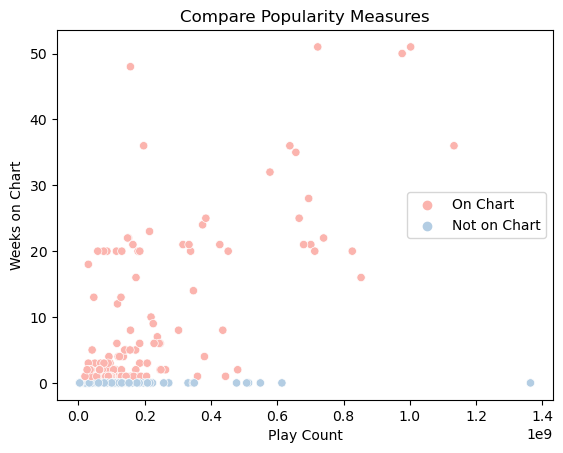

In [8]:
# Play Count v Weeks on Chart

chart = ['On Chart']*len(data)
for i in range(len(data)):
    if (data.loc[i,'Weeks on Chart']==0):
        chart[i] = 'Not on Chart'

sns.scatterplot(x=data['Play Count'], y=data['Weeks on Chart'], hue=chart, palette='Pastel1')
plt.xlabel('Play Count')
plt.ylabel('Weeks on Chart')
plt.title('Compare Popularity Measures');
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\compare-popularity-2.jpg")

In [9]:
# Sorted by Play Count

data_play = data[data['Album']!='The Taylor Swift Holiday Collection']
data_play.sort_values('Play Count', axis=0).tail(15).iloc[::-1]

,Title,Album,Track Number,Play Count,Duration in Seconds,Peak Chart Position,Weeks on Chart,Single,Music Video,Set List
198,I Don’t Wanna Live Forever,Single,1,1363948086,247.160000,0,0,0,0,0
94,Blank Space,1989,2,1133193347,181.506000,1,36,1,1,1
23,Love Story,Fearless,3,1002409964,235.516000,4,51,1,1,1
98,Shake It Off,1989,6,976691450,219.200000,1,50,1,1,1
68,All Too Well,Red,5,852777440,423.359667,1,16,1,0,1
114,Look What You Made Me Do,reputation,6,826263991,211.853000,1,20,1,1,1
126,Lover,Lover,3,739742198,221.306000,10,22,1,1,1
26,You Belong With Me,Fearless,6,722007416,231.128500,2,51,1,1,1
139,ME!,Lover,16,713075114,193.000000,2,20,1,1,0
137,You Need To Calm Down,Lover,14,701187750,171.360000,2,21,1,1,1


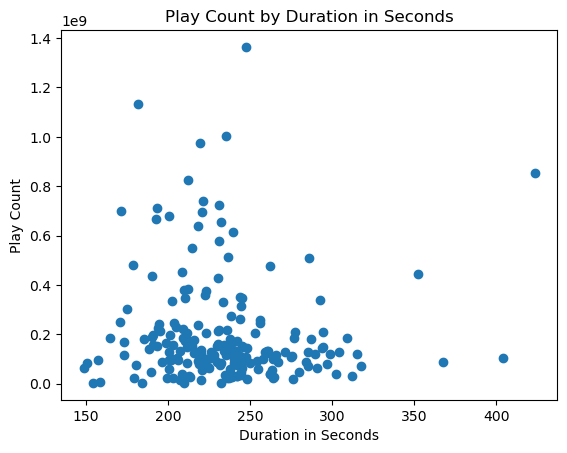

In [10]:
# Play Count by Duration in Seconds

plt.scatter(data['Duration in Seconds'], data['Play Count'])
plt.xlabel('Duration in Seconds')
plt.ylabel('Play Count')
plt.title('Play Count by Duration in Seconds');
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\duration-v-play.jpg")

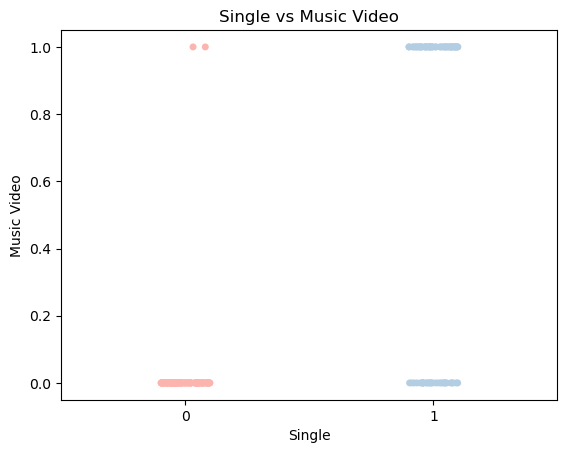

In [11]:
# Singles vs Music Videos

sns.stripplot(x='Single',y='Music Video',data=data, palette='Pastel1')
plt.title('Single vs Music Video');
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\single-v-video.jpg")

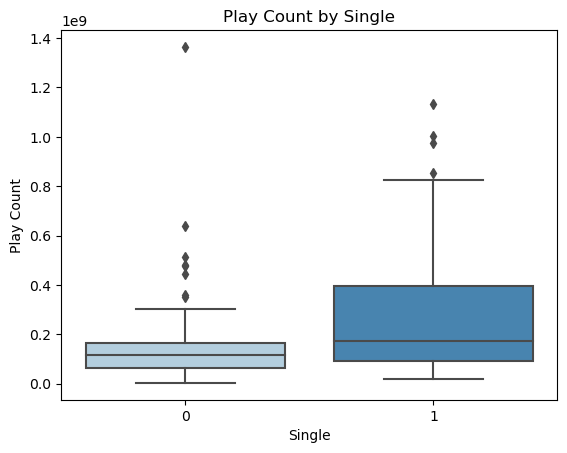

In [12]:
# Play Count v Single

sns.boxplot(x=data['Single'],y=data['Play Count'], palette='Blues')
plt.title('Play Count by Single');
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\single-play.jpg")

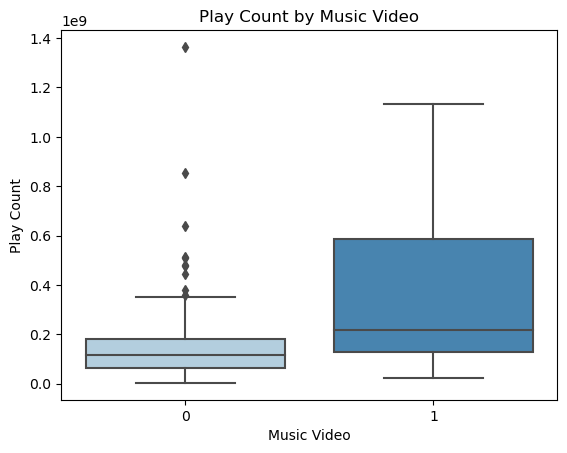

In [13]:
# Play Count v Music Video

sns.boxplot(x=data['Music Video'],y=data['Play Count'], palette='Blues')
plt.title('Play Count by Music Video');
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\video-play.jpg")

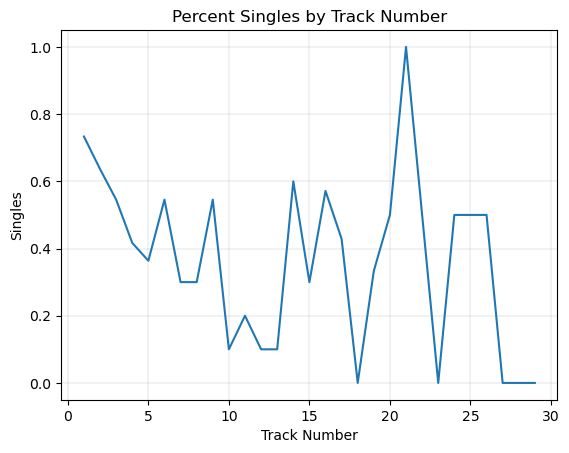

In [14]:
# Singles v Track Number

track_avg = list(data.groupby('Track Number')['Single'].mean())
track = range(1,30)
ax = sns.lineplot(x=track, y=track_avg)
plt.xlabel('Track Number')
plt.ylabel('Singles')
plt.title('Percent Singles by Track Number')
ax.grid(visible=True, which='major', color='black', linewidth=0.075);
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\single-track.jpg")

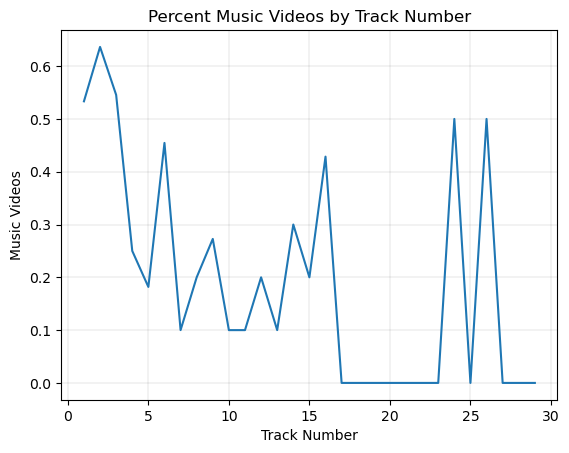

In [15]:
# Music Videos v Track Number

track_avg = list(data.groupby('Track Number')['Music Video'].mean())
track = range(1,30)
ax = sns.lineplot(x=track, y=track_avg)
plt.xlabel('Track Number')
plt.ylabel('Music Videos')
plt.title('Percent Music Videos by Track Number')
ax.grid(visible=True, which='major', color='black', linewidth=0.075);
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\single-video.jpg")

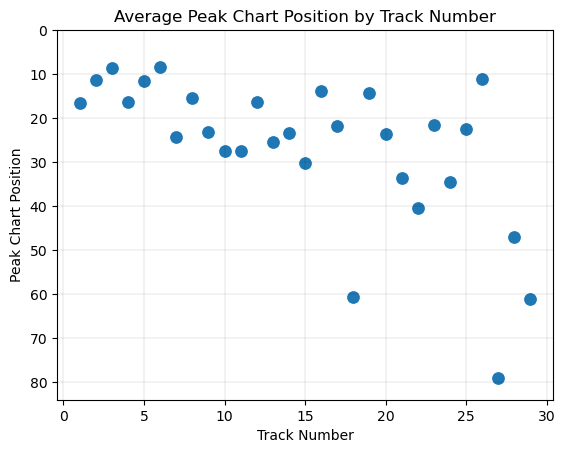

In [16]:
# Track Number v Peak Chart Position

y = list(data.groupby('Track Number').mean()['Peak Chart Position'])
plot = sns.scatterplot(x=range(1,30), y=y, palette='tab10', s=100)
plt.xlabel('Track Number')
plt.ylabel('Peak Chart Position')
plt.ylim(max(y)+5, 0)
plt.title('Average Peak Chart Position by Track Number')
plot.grid(visible=True, which='major', color='black', linewidth=0.075);
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\track-peak.jpg")

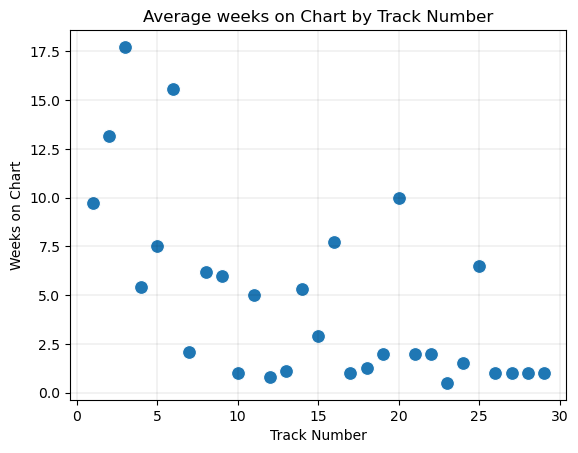

In [17]:
# Track Number v Weeks on Chart

y = list(data.groupby('Track Number').mean()['Weeks on Chart'])
plot = sns.scatterplot(x=range(1,30), y=y, palette='tab10', s=100)
plt.xlabel('Track Number')
plt.ylabel('Weeks on Chart')
plt.title('Average weeks on Chart by Track Number')
plot.grid(visible=True, which='major', color='black', linewidth=0.075);
#plt.savefig("C:\\Users\\kelse\\Dropbox\\6- Winter 2023\\Stat 386\\my386blog\\assets\\images\\blog3b\\track-weeks.jpg")